# **1- 1. Importing Required Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# **2. Flux Integral Validation**

## **2.1 Flux Integral Definition**

The equation of flux integral is defined here.

In [3]:
def T_V(Nx,Ny,x0,y0):
    dx, dy= x0/Nx, y0/Ny
    x=np.linspace(0-dx/2,x0+dx/2,Nx+2)
    y=np.linspace(0-dy/2,y0+dy/2,Ny+2)
    T=np.zeros((Ny+2,Nx+2))
    u=np.zeros((Ny+2,Nx+2))
    v=np.zeros((Ny+2,Nx+2))
    T0=5
    u0=5
    v0=5

    for i in range(Ny+2):
        for j in range(Nx+2):
            T[i,j]=T0*np.cos(np.pi*x[j])*np.sin(np.pi*y[i])
            u[i,j]=u0*y[i]*np.sin(np.pi*x[j])
            v[i,j]=v0*x[j]*np.cos(np.pi*y[i])

    return T,u,v

## **2.2 Numerical Discretization of the Flux Integral**

Discretization using second-order central differences.

In [4]:
def numerical_flux(Nx,Ny,x0,y0,T,u,v):
    dx, dy= x0/Nx, y0/Ny
    x=np.linspace(0-dx/2,x0+dx/2,Nx+2)
    y=np.linspace(0-dy/2,y0+dy/2,Ny+2)
    Re=25
    Pr=0.7
    Ec=0.1
    FI=np.zeros((Ny+2,Nx+2))

    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            FI[i,j] = 1/dx*((u[i,j+1]*T[i,j+1]-u[i,j-1]*T[i,j-1])/2-
1/(Re*Pr*dx)*(T[i,j+1]-2*T[i,j]+T[i,j-1]))+1/dy*((v[i+1,j]*T[i+1,j]-v[i-1,j]*T[i-1,j])/2-1/(Re*Pr*dy)*(T[i-1,j]-2*T[i,j]+T[i+1,j]))

    return FI


## **2.3 Analytical Solution of the Flux Integral**

Derivation and implementation of the exact flux integral solution.

In [5]:
def exact_flux(Nx,Ny,x0,y0):
    dx, dy= x0/Nx, y0/Ny
    x=np.linspace(0-dx/2,x0+dx/2,Nx+2)
    y=np.linspace(0-dy/2,y0+dy/2,Ny+2)
    xx=x[1:Nx+1]
    yy=y[1:Ny+1]
    T0=5
    u0=5
    v0=5
    Re=25
    Pr=0.7
    Ec=0.1
    FI_e=np.zeros((Ny,Nx))

    for i in range(Ny):
        for j in range(Nx):
             FI_e[i,j] = (u0*T0*np.pi*np.cos(2*np.pi*xx[j])*yy[i]*np.sin(np.pi*yy[i])+v0*T0*np.pi*xx[j]*np.cos(np.pi*xx[j])*np.cos(2*np.pi*yy[i])+1/(Re*Pr)*(2*T0*(np.pi)**2*np.cos(np.pi*xx[j])*np.sin(np.pi*yy[i])))
    return FI_e

In [6]:
# giving eaxct and numerical fluxes values to determine the accuracy of the numerical solution of flux integral
[t1,u1,v1]=T_V(10,10,1,1)
print(numerical_flux(10,10,1,1,t1,u1,v1))
print(exact_flux(10,10,1,1))

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           4.86165019  10.45658925  12.97138152  11.16270228
    4.50935991  -6.69559803 -21.35535219 -37.67667574 -53.36368607
  -65.88366998   0.        ]
 [  0.           9.39941971  10.97547942   9.42999296   5.07411655
   -1.32114936  -8.87150055 -16.83785605 -24.69870449 -32.02918819
  -38.27162156   0.        ]
 [  0.          16.25918242  11.15849218   2.7967705   -5.83871857
  -11.7339127  -12.97138152  -9.42999296  -2.7967705    4.11021935
    8.4461118    0.        ]
 [  0.          24.58112539  12.13655053  -4.11021935 -18.06733577
  -24.05182122 -18.8552756   -2.98637299  19.37893088  41.73460651
   57.39082319   0.        ]
 [  0.          33.06338568  14.77800913  -8.4461118  -27.78972615
  -35.11235556 -25.90966423  -1.0824757   33.15140602  67.19393944
   91.16689202   0.        ]
 [  0.          39.96506777  19.043483

## **2.4 Determination of Convergence Order for Flux Integral**

Compute L_1, L_2, and L_inf norms to assess accuracy.

In [7]:
def norm(FI,FI_e,Nx,Ny):
    Error = np.abs(FI[1:Ny+1,1:Nx+1] - FI_e)
    L_1 = np.mean(Error)
    L_2 = np.sqrt(np.mean(Error ** 2))
    L_inf = np.max(Error)

    return L_1,L_2,L_inf

In [8]:
# giving above equation valu for mesh
[t1,u1,v1]=T_V(10,10,1,1)
FI_1=numerical_flux(10,10,1,1,t1,u1,v1)
FI_e1=exact_flux(10,10,1,1)
[t2,u2,v2]=T_V(20,20,1,1)
FI_2=numerical_flux(20,20,1,1,t2,u2,v2)
FI_e2=exact_flux(20,20,1,1)
[l1_10,l2_10,l3_10]=norm(FI_1,FI_e1,10,10)
[l1_20,l2_20,l3_20]=norm(FI_2,FI_e2,20,20)
print(l1_10,l2_10,l3_10)
print(l1_20,l2_20,l3_20)


1.6870103683981486 2.201034439711915 7.093929267531635
0.4291787025206378 0.5594813525979867 1.8872236717176065


## **2.5 Determination of Convergence Order for Flux Integral**

Assess numerical order of accuracy by refining the mesh.

Order:  1.9760197669606592


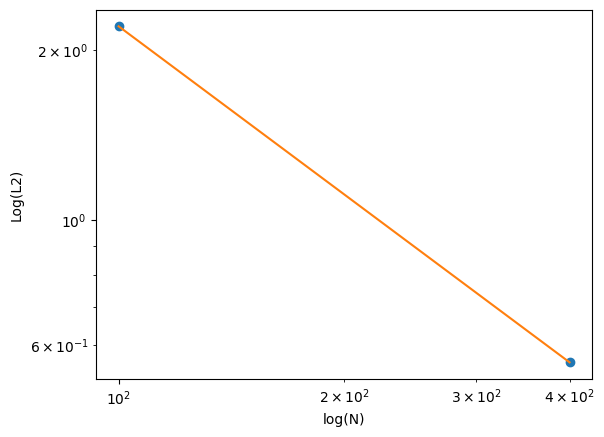

In [9]:
x = [100,400]
y = [l2_10,l2_20]
plt.xscale("log")
plt.yscale("log")
plt.plot(x,y,'o')
plt.plot(x,y)
plt.xlabel('log(N)')
plt.ylabel('Log(L2)')
logx = np.log([100,400])
logy = np.log([l2_10,l2_20])
[m, b] = np.polyfit(logx, logy, 1)
print('Order: ',2*np.abs(m))
plt.show()

# **3. Source Term Validation**

## **3.1 Numerical Discretization of the Source Term**

Central differencing scheme for source term evaluation.

In [10]:
def S_num(Nx,Ny,x0,y0,u,v):
    dx, dy= x0/Nx, y0/Ny
    Ec=0.1
    Re=25
    Pr=0.7
    S=np.zeros((Ny+2,Nx+2))

    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            S[i,j]=Ec/Re*(2*(((u[i,j+1]-u[i,j-1])/(2*dx))**2)
            +2*(((v[i+1,j]-v[i-1,j])/(2*dy))**2)+((u[i+1,j]-u[i-1,j])/(2*dy)+(v[i,j+1]-v[i,j-1])/(2*dx))**2)

    return S

## **3.2 Analytical Solution for the Source Term**

Derivation and implementation of the exact source term solution.

In [11]:
def S_exact(Nx,Ny,x0,y0):
    dx, dy= x0/Nx, y0/Ny
    x=np.linspace(0-dx/2,x0+dx/2,Nx+2)
    y=np.linspace(0-dy/2,y0+dy/2,Ny+2)
    xx=x[1:Nx+1]
    yy=y[1:Ny+1]
    u0=5
    v0=5
    Ec=0.1
    Re=25
    Pr=0.7
    S_e=np.zeros((Ny,Nx))

    for i in range(Ny):
        for j in range(Nx):
            S_e[i,j]=Ec/Re*(2*(u0*np.pi*np.cos(np.pi*xx[j])*yy[i])**2
            +2*(v0*np.pi*xx[j]*np.sin(np.pi*yy[i]))**2+(u0*np.sin(np.pi*xx[j])+v0*np.cos(np.pi*yy[i]))**2)

    return S_e

In [13]:
# giving value to the eaxact and numerical solutions
[t1,u1,v1]=T_V(10,10,1,1)
S1=S_num(10,10,1,1,u1,v1)
S_e1=S_exact(10,10,1,1)
print(S1)
print(S_e1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.13567627 0.21268587 0.29254139 0.35965878 0.39979236
  0.40446605 0.37367984 0.31590983 0.24540168 0.17773946 0.        ]
 [0.         0.15261693 0.22387288 0.30148408 0.37463341 0.43371111
  0.47307411 0.49272243 0.49829911 0.49941392 0.50688399 0.        ]
 [0.         0.19340096 0.25106278 0.31936438 0.39697558 0.4835244
  0.5790159  0.68345009 0.79682189 0.9195033  1.05282449 0.        ]
 [0.         0.26928128 0.30229195 0.34655428 0.41485588 0.52059955
  0.67221955 0.86971588 1.10465428 1.36363195 1.63386128 0.        ]
 [0.         0.3917228  0.38621196 0.38438397 0.41765226 0.51764229
  0.7039516  0.97658022 1.31593056 1.69037719 2.06850667 0.        ]
 [0.         0.56824342 0.50942406 0.43562912 0.40126162 0.46051257
  0.64682189 0.96018958 1.36717571 1.81358929 2.24502729 0.        ]
 [0.         0.79980133 0.674709   0.50462088 0.37

## **3.3 Error Norms for Source Term Approximation**

Compute accuracy metrics (L_1, L_2, and L_inf)


In [ ]:
[t1,u1,v1]=T_V(10,10,1,1)
S1=S_num(10,10,1,1,u1,v1)
S_e1=S_exact(10,10,1,1)
[t2,u2,v2]=T_V(20,20,1,1)
S2=S_num(20,20,1,1,u2,v2)
S_e2=S_exact(20,20,1,1)
[ls1_10,ls2_10,ls3_10]=norm(S1,S_e1,10,10)
[ls1_20,ls2_20,ls3_20]=norm(S2,S_e2,20,20)

print(ls1_10,ls2_10,ls3_10)
print(ls1_20,ls2_20,ls3_20)

0.021310198969142595 0.02886154290823953 0.07533950389107025
0.005390472855500225 0.007306837851366595 0.019861354275149345


Order:  1.9818293294228397


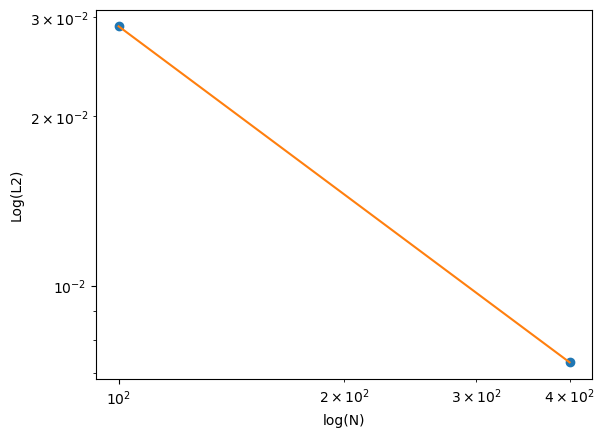

In [ ]:
# order of accuracy for the source term
x = [100,400]
y = [ls2_10,ls2_20]
plt.xscale("log")
plt.yscale("log")
plt.plot(x,y,'o')
plt.plot(x,y)
plt.xlabel('log(N)')
plt.ylabel('Log(L2)')
logx = np.log([100,400])
logy = np.log([ls2_10,ls2_20])
[m, b] = np.polyfit(logx, logy, 1)
print('Order: ',2*np.abs(m))
plt.show()

# **4. Implicit Time-Stepping Method for Energy Equation**

Implementation of an implicit time-stepping method using approximate factorization.

## **4.1 Implementation of the Thomas Algorithm**

Efficient tridiagonal solver for the implicit scheme.

In [ ]:
def thomassolver(a,b,c,d):
    n = len(d)
    x = np.zeros(n)
    g_mod = [c[0] / b[0]]
    for j in range(1,n-1):
        gg = c[j] / (b[j] - g_mod[j-1]*a[j])
        g_mod.append(gg)

    d_mod = [d[0] / b[0]]
    for j in range(1,n):
        dd = (d[j] - d_mod[j-1]*a[j]) / (b[j] - g_mod[j-1]*a[j])
        d_mod.append(dd)

    x[n-1] = d_mod[-1]
    for j in range(n-2,-1,-1):
        x[j] = d_mod[j] - g_mod[j]*x[j+1]
    return x

## **4.2 Boundary Condition Definition for the Implicit Solver**



Apply Dirichlet boundary conditions for temperature.

In [ ]:
def BC(Nx,Ny,x0,y0,Tn):
    dx,dy=x0/Nx, y0/Ny
    x=np.linspace(0-dx/2,x0+dx/2,Nx+2)
    y=np.linspace(y0+dy/2,0-dy/2,Ny+2)
    T=np.zeros((Ny+2,Nx+2))
    Re=25
    Ec=0.1
    Pr=0.7
    ubar=3

    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            T[i,j]=Tn[i,j]

    for i in range(Ny+2):
        T[i,0]=2*(y[i]+(3/4)*Pr*Ec*(ubar**2)*(1-((1-2*y[i])**4)))-T[i,1]
        T[i,Nx+1]=T[i,Nx]

    for j in range(Nx+2):
        T[0,j]=2-T[1,j]
        T[Ny+1,j]=-T[Ny,j]

    return T

## **4.3 Implicit Discretization of the Energy Equation**



Formulation using an Alternating Direction Implicit (ADI) approach.

In [ ]:
def implicit(Nx, Ny, x0, y0):
    dt = 0.08
    dx, dy = x0 / Nx, y0 / Ny
    x = np.linspace(0-dx/2, x0+dx/2, Nx+2)
    y = np.linspace(y0+dy/2, 0-dy/2, Ny+2)
    Re = 25
    Ec = 0.1
    Pr = 0.7
    ubar = 3
    T = np.zeros((Ny + 2, Nx + 2))
    deltaT_ht = np.zeros((Ny + 2, Nx + 2))
    deltaT = np.zeros((Ny + 2, Nx + 2))
    Cx = np.zeros((Ny+2,Nx+2))
    Bx = np.zeros((Ny+2,Nx + 2))
    Ax = np.zeros((Ny+2,Nx + 2))
    Dx = np.zeros((Ny+2,Nx + 2))
    Cy = np.zeros((Ny+2,Nx+2))
    By = np.zeros((Ny+2,Nx+2))
    Ay = np.zeros((Ny+2,Nx+2))
    Dy = np.zeros((Ny+2,Nx+2))
    u = np.zeros((Ny+2,Nx+2))
    v = np.zeros((Ny+2,Nx+2))

    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            u[i,j] = 6 * ubar * y[i] * (1 - y[i])

    for j in range(Nx+1):
        u[0,j] = -u[1,j]
        u[Ny+1, j] = -u[Ny,j]
    for i in range(Ny+1):
        u[i,0] = 2 * (6 * ubar * y[i] * (1 - y[i])) - u[i, 1]
        u[i,Nx+1] = 2 * (6 * ubar * y[i] * (1 - y[i])) - u[i, Nx]

    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            T[i,j] = y[i]

    L2 = 1
    L = []
    iteration = []
    n = 0
    while (L2 > 10**-12):
        T0 = T.copy()
        T0 = BC(Nx, Ny, x0, y0, T0)

        for i in range(1,Ny+1):
            for j in range(Nx+2):
                if j == 0:
                    Cx[i,j] = 1
                    Bx[i,j] = 1
                    Dx[i,j] = 0
                elif j == Nx+1:
                    Bx[i,j] = 1
                    Ax[i,j] = -1
                    Dx[i,j] = 0
                else:
                    Cx[i,j] = dt / dx * ((u[i,j+1] / 2) - (1 / (Re * Pr * dx)))
                    Bx[i,j] = 1 + (2 * dt / (Re * Pr * (dx**2)))
                    Ax[i,j] = dt / dx * ((-u[i, j-1] / 2) - (1 / (Re * Pr * dx)))
                    Dx[i,j] = dt*(S_num(Nx, Ny, x0, y0, u, v)[i,j]-numerical_flux(Nx, Ny, x0, y0, T0, u, v)[i,j])

            deltaT_ht[i,:] = thomassolver(Ax[i,:],Bx[i,:],Cx[i,:],Dx[i,:])

        for j in range(1,Nx+1):
            for i in range(Ny+2):
                if i==0:
                    Cy[i,j]=1
                    By[i, j] = 1
                    Dy[i, j] = 0
                elif i==Ny+1:
                    By[i, j] = 1
                    Ay[i, j] = 1
                    Dy[i, j] = 0
                else:
                    Cy[i, j] = dt / dy * ((v[i + 1, j] / 2) - (1 / (Re * Pr * dy)))
                    By[i, j] = 1 + (2 * dt / (Re * Pr * dy**2))
                    Ay[i, j] = dt / dy * ((-v[i - 1, j] / 2) - (1 / (Re * Pr * dy)))
                    Dy[i, j] = deltaT_ht[i, j]

            deltaT[:,j]=thomassolver(Ay[:,j],By[:,j],Cy[:,j],Dy[:,j])

        T=T0+deltaT
        err=np.abs(T0[1:Ny+1,1:Nx+1]-T[1:Ny+1,1:Nx+1])
        L2=np.sqrt(np.mean(err**2))
        L.append(L2)
        n+=1
        iteration.append(n)

    return T

## **4.4 Analytical Solution for the Energy Equation (T_exact Definition)**



Obtain the theoretical solution for validation.

In [ ]:
def T_exact(Nx,Ny,x0,y0):
    dx, dy= x0/Nx, y0/Ny
    x=np.linspace(0-dx/2,x0+dx/2,Nx+2)
    y=np.linspace(y0+dy/2,0-dy/2,Ny+2)
    Te=np.zeros((Ny+2,Nx+2))
    Re=25
    Ec=0.1
    Pr=0.7
    ubar=3
    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            Te[i,j]=y[i]+(3/4)*Pr*Ec*(ubar**2)*(1-(1-2*y[i])**4)

    return Te[1:Ny+1,1:Nx+1]

## **4.5 Numerical vs. Analytical Solution: Error Analysis**

Compute deviation metrics between exact and numerical solutions.

In [ ]:
Te1=T_exact(25,10,5,1)
T1=implicit(25,10,5,1)
Te2=T_exact(50,20,5,1)
T2=implicit(50,20,5,1)
print(Te1)
print(T1[1:11,1:26])
[l1_25_10,l2_25_10,l3_25_10]=norm(T1,Te1,25,10)
[l1_50_20,l2_50_20,l3_50_20]=norm(T2,Te2,50,20)
print(l1_25_10,l2_25_10,l3_25_10)
print(l1_50_20,l2_50_20,l3_50_20)

[[1.11249275 1.11249275 1.11249275 1.11249275 1.11249275 1.11249275
  1.11249275 1.11249275 1.11249275 1.11249275 1.11249275 1.11249275
  1.11249275 1.11249275 1.11249275 1.11249275 1.11249275 1.11249275
  1.11249275 1.11249275 1.11249275 1.11249275 1.11249275 1.11249275
  1.11249275]
 [1.20905275 1.20905275 1.20905275 1.20905275 1.20905275 1.20905275
  1.20905275 1.20905275 1.20905275 1.20905275 1.20905275 1.20905275
  1.20905275 1.20905275 1.20905275 1.20905275 1.20905275 1.20905275
  1.20905275 1.20905275 1.20905275 1.20905275 1.20905275 1.20905275
  1.20905275]
 [1.19296875 1.19296875 1.19296875 1.19296875 1.19296875 1.19296875
  1.19296875 1.19296875 1.19296875 1.19296875 1.19296875 1.19296875
  1.19296875 1.19296875 1.19296875 1.19296875 1.19296875 1.19296875
  1.19296875 1.19296875 1.19296875 1.19296875 1.19296875 1.19296875
  1.19296875]
 [1.11867275 1.11867275 1.11867275 1.11867275 1.11867275 1.11867275
  1.11867275 1.11867275 1.11867275 1.11867275 1.11867275 1.11867275
  1.11

## **4.6 Order of Accuracy Assessment for the Implicit Method**

Evaluate the method’s convergence properties.

Order:  1.8003437972991228


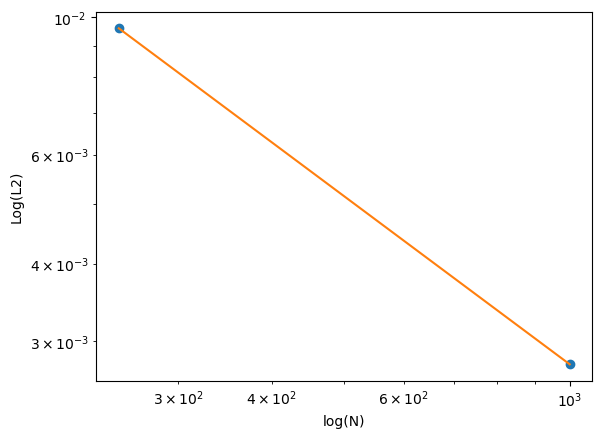

In [ ]:
x = [250,1000]
y = [l2_25_10,l2_50_20]
plt.xscale("log")
plt.yscale("log")
plt.plot(x,y,'o')
plt.plot(x,y)
plt.xlabel('log(N)')
plt.ylabel('Log(L2)')
logx = np.log([250,1000])
logy = np.log([l2_25_10,l2_50_20])
[m, b] = np.polyfit(logx, logy, 1)
print('Order: ',2*np.abs(m))
plt.show()

## **4.7 Visualization: Temperature Contours and Profiles**

Generate contour plots comparing numerical and analytical solutions.

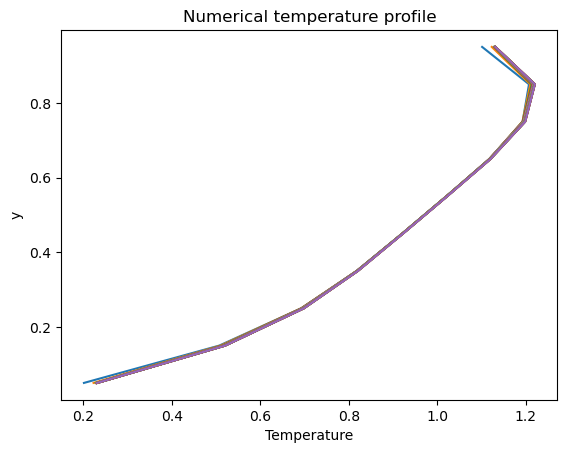

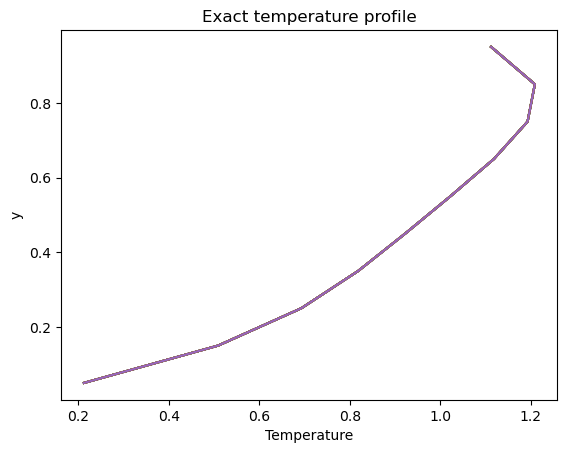

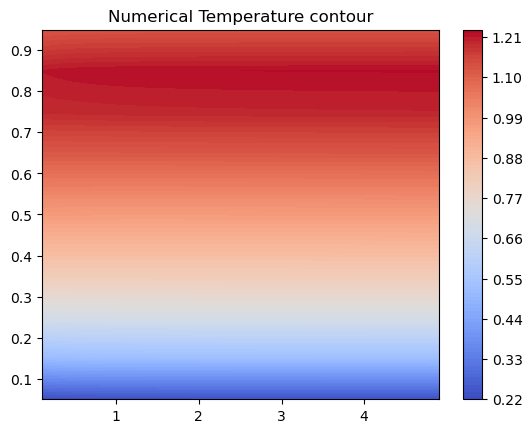

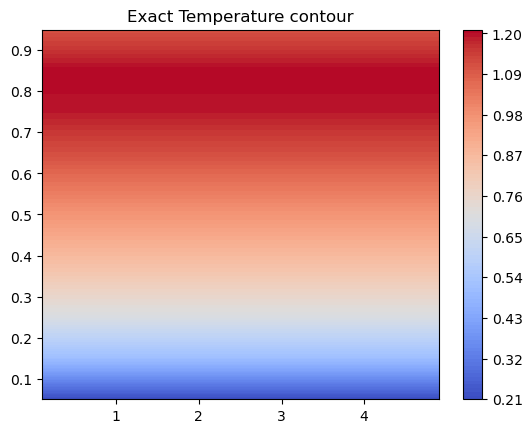

In [ ]:
Nx=25
Ny=10
x0=5
y0=1
dx,dy=x0/Nx,y0/Ny
x=np.linspace(0-dx/2,x0+dx/2,Nx+2)
y=np.linspace(y0+dy/2,0-dy/2,Ny+2)

for i in range(Nx):
    plt.plot(T1[1:Ny+1,i],y[1:Ny+1])
plt.title('Numerical temperature profile')
plt.ylabel('y')
plt.xlabel('Temperature')
plt.show()

for i in range(Nx):
    plt.plot(Te1[:,i],y[1:Ny+1])
plt.title('Exact temperature profile')
plt.ylabel('y')
plt.xlabel('Temperature')
plt.show()

plt.contourf(x[1:Nx+1],y[1:Ny+1],T1[1:Ny+1,1:Nx+1],100,cmap='coolwarm')
plt.colorbar()
plt.title('Numerical Temperature contour')
plt.show()

plt.contourf(x[1:Nx+1],y[1:Ny+1],Te1,100,cmap='coolwarm')
plt.colorbar()
plt.title('Exact Temperature contour')
plt.show()



# **5. Simulation of Developing Flow the domain**

## **5.1 Boundary Condition Definition for Developing Flow**



Implement velocity-dependent temperature boundary conditions.

In [ ]:
def BC_real(Nx,Ny,x0,y0,Tn):
    dx,dy=x0/Nx, y0/Ny
    x=np.linspace(0-dx/2,x0+dx/2,Nx+2)
    y=np.linspace(y0+dy/2,0-dy/2,Ny+2)
    T=np.zeros((Ny+2,Nx+2))
    Re=25
    Ec=0.1
    Pr=0.7
    ubar=3

    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            T[i,j]=Tn[i,j]

    for i in range(Ny+2):
        T[i,0]=-T[i,1]
        T[i,Nx+1]=T[i,Nx]

    for j in range(Nx+2):
        T[0,j]=2-T[1,j]
        T[Ny+1,j]=-T[Ny,j]


    return T

## **5.2 Incorporation of Realistic Boundary Conditions in the Implicit Solver**


Modify the numerical scheme to accommodate developing flow.

In [ ]:
def implicit_real(Nx, Ny, x0, y0):
    dt = 0.08
    dx, dy = x0 / Nx, y0 / Ny
    x = np.linspace(0-dx/2, x0+dx/2, Nx+2)
    y = np.linspace(y0+dy/2, 0-dy/2, Ny+2)
    Re = 25
    Ec = 0.1
    Pr = 0.7
    ubar = 3
    T = np.zeros((Ny + 2, Nx + 2))
    deltaT_ht = np.zeros((Ny + 2, Nx + 2))
    deltaT = np.zeros((Ny + 2, Nx + 2))
    Cx = np.zeros((Ny+2,Nx+2))
    Bx = np.zeros((Ny+2,Nx + 2))
    Ax = np.zeros((Ny+2,Nx + 2))
    Dx = np.zeros((Ny+2,Nx + 2))
    Cy = np.zeros((Ny+2,Nx+2))
    By = np.zeros((Ny+2,Nx+2))
    Ay = np.zeros((Ny+2,Nx+2))
    Dy = np.zeros((Ny+2,Nx+2))
    u = np.zeros((Ny+2,Nx+2))
    v = np.zeros((Ny+2,Nx+2))

    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            u[i,j] = 6 * ubar * y[i] * (1 - y[i])

    for j in range(Nx+1):
        u[0,j] = -u[1,j]
        u[Ny+1, j] = -u[Ny,j]
    for i in range(Ny+1):
        u[i,0] = 2 * (6 * ubar * y[i] * (1 - y[i])) - u[i, 1]
        u[i,Nx+1] = 2 * (6 * ubar * y[i] * (1 - y[i])) - u[i, Nx]

    for i in range(1,Ny+1):
        for j in range(1,Nx+1):
            T[i,j] = y[i]

    L2 = 1
    L = []
    iteration = []
    n = 0
    while (L2 > 10**-12):
        T0 = T.copy()
        T0 = BC_real(Nx, Ny, x0, y0, T0)

        for i in range(1,Ny+1):
            for j in range(Nx+2):
                if j == 0:
                    Cx[i,j] = 1
                    Bx[i,j] = 1
                    Dx[i,j] = 0
                elif j == Nx+1:
                    Bx[i,j] = 1
                    Ax[i,j] = -1
                    Dx[i,j] = 0
                else:
                    Cx[i,j] = dt / dx * ((u[i,j+1] / 2) - (1 / (Re * Pr * dx)))
                    Bx[i,j] = 1 + (2 * dt / (Re * Pr * (dx**2)))
                    Ax[i,j] = dt / dx * ((-u[i, j-1] / 2) - (1 / (Re * Pr * dx)))
                    Dx[i,j] = dt*(S_num(Nx, Ny, x0, y0, u, v)[i,j]-numerical_flux(Nx, Ny, x0, y0, T0, u, v)[i,j])

            deltaT_ht[i,:] = thomassolver(Ax[i,:],Bx[i,:],Cx[i,:],Dx[i,:])

        for j in range(1,Nx+1):
            for i in range(Ny+2):
                if i==0:
                    Cy[i,j]=1
                    By[i, j] = 1
                    Dy[i, j] = 0
                elif i==Ny+1:
                    By[i, j] = 1
                    Ay[i, j] = 1
                    Dy[i, j] = 0
                else:
                    Cy[i, j] = dt / dy * ((v[i + 1, j] / 2) - (1 / (Re * Pr * dy)))
                    By[i, j] = 1 + (2 * dt / (Re * Pr * dy**2))
                    Ay[i, j] = dt / dy * ((-v[i - 1, j] / 2) - (1 / (Re * Pr * dy)))
                    Dy[i, j] = deltaT_ht[i, j]

            deltaT[:,j]=thomassolver(Ay[:,j],By[:,j],Cy[:,j],Dy[:,j])

        T=T0+deltaT
        err=np.abs(T0[1:Ny+1,1:Nx+1]-T[1:Ny+1,1:Nx+1])
        L2=np.sqrt(np.mean(err**2))
        L.append(L2)
        n+=1
        iteration.append(n)
        q=(T[-2,1:Nx+1]-T[-1,1:Nx+1])/dy

    return T,q

In [ ]:
# Implicit solution for differrent channel lenght and different mesh size in following code blocks
[T1_r,Q1]=implicit_real(25, 10, 5, 1)
[T2_r,Q2]=implicit_real(50, 20, 5, 1)

In [ ]:
[T3_r,Q3]=implicit_real(25, 10, 40, 1)
[T4_r,Q4]=implicit_real(50, 20, 40, 1)

## **5.3 Determination of Thermal Entry Length via Wall Heat Flux Analysis**

Plot the heat flux distribution along the channel walls.

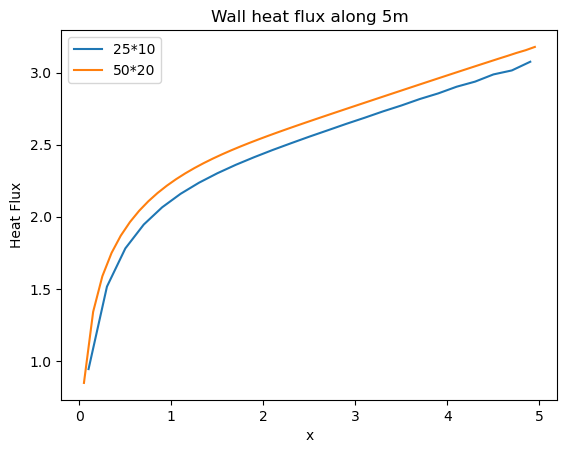

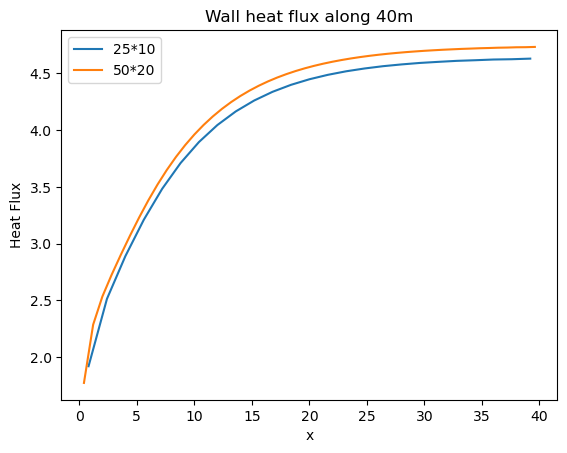

In [ ]:
Nx1=25
Ny1=10
x01=5
y01=1
dx1,dy1=x01/Nx1,y01/Ny1
x1=np.linspace(0-dx1/2,x01+dx1/2,Nx1+2)
plt.plot(x1[1:Nx1+1],Q1)

Nx2=50
Ny2=20
x02=5
y02=1
dx2,dy2=x02/Nx2,y02/Ny2
x2=np.linspace(0-dx2/2,x02+dx2/2,Nx2+2)
plt.plot(x2[1:Nx2+1],Q2)
plt.legend(['25*10','50*20'])
plt.ylabel('Heat Flux')
plt.xlabel('x')
plt.title('Wall heat flux along 5m')
plt.show()


Nx3=25
Ny3=10
x03=40
y03=1
dx3,dy3=x03/Nx3,y03/Ny3
x3=np.linspace(0-dx3/2,x03+dx3/2,Nx3+2)
plt.plot(x3[1:Nx3+1],Q3)

Nx4=50
Ny4=20
x04=40
y04=1
dx4,dy4=x04/Nx4,y04/Ny4
x4=np.linspace(0-dx4/2,x04+dx4/2,Nx4+2)
plt.plot(x4[1:Nx4+1],Q4)
plt.legend(['25*10','50*20'])
plt.ylabel('Heat Flux')
plt.xlabel('x')
plt.title('Wall heat flux along 40m')
plt.show()

# **6. Explicit Time-Stepping Methods for Energy Equation**

## **6.1 Runge-Kutta 2nd Order (RK2) Discretization**

From this point forward, the previous code (which employed the implicit method) has concluded, and we will now proceed to solve the problem using the explicit methods.

In [ ]:
def RK2(Nx, Ny, x0, y0):
    dt = 0.065
    dx, dy = x0 / Nx, y0 / Ny
    x = np.linspace(0 - dx / 2, x0 + dx / 2, Nx + 2)
    y = np.linspace(y0 + dy / 2, 0 - dy / 2, Ny + 2)
    Re = 25
    Ec = 0.1
    Pr = 0.7
    ubar = 3
    T = np.zeros((Ny + 2, Nx + 2))
    T_half = np.zeros((Ny + 2, Nx + 2))
    u = np.zeros((Ny + 2, Nx + 2))
    v = np.zeros((Ny + 2, Nx + 2))

    for i in range(1, Ny + 1):
        for j in range(1, Nx + 1):
            u[i, j] = 6 * ubar * y[i] * (1 - y[i])

    for j in range(Nx + 2):
        u[0, j] = -u[1, j]
        u[Ny + 1, j] = -u[Ny, j]
    for i in range(Ny + 2):
        u[i, 0] = 2 * (6 * ubar * y[i] * (1 - y[i])) - u[i, 1]
        u[i, Nx + 1] = 2 * (6 * ubar * y[i] * (1 - y[i])) - u[i, Nx]

    for i in range(1, Ny + 1):
        for j in range(1, Nx + 1):
            T[i, j] = y[i]

    L2 = 1
    L = []
    iteration = []
    n = 0
    while L2 > 10**-12:
        T0 = T.copy()
        T0 = BC_real(Nx, Ny, x0, y0, T0)
        T_half[1:Ny+1, 1:Nx+1] = T0[1:Ny+1, 1:Nx+1] + dt / 2 * (-numerical_flux(Nx, Ny, x0, y0, T0, u, v)[1:Ny+1, 1:Nx+1] + S_num(Nx, Ny, x0, y0, u, v)[1:Ny+1, 1:Nx+1])
        T_half = BC_real(Nx, Ny, x0, y0, T_half)
        T[1:Ny+1, 1:Nx+1] = T0[1:Ny+1, 1:Nx+1] + dt * (-numerical_flux(Nx, Ny, x0, y0, T_half, u, v)[1:Ny+1, 1:Nx+1] + S_num(Nx, Ny, x0, y0, u, v)[1:Ny+1, 1:Nx+1])
        err = np.abs(T0[1:Ny+1, 1:Nx+1] - T[1:Ny+1, 1:Nx+1])
        L2 = np.sqrt(np.mean(err**2))
        L.append(L2)
        n += 1
        iteration.append(n)

    return T


## **6.2 Runge-Kutta 4th Order (RK4) Discretization**

Implement the RK4 explicit method for improved accuracy.

In [ ]:
def RK4(Nx, Ny, x0, y0):
    dt = 0.018
    dx, dy = x0 / Nx, y0 / Ny
    x = np.linspace(0 - dx / 2, x0 + dx / 2, Nx + 2)
    y = np.linspace(y0 + dy / 2, 0 - dy / 2, Ny + 2)
    Re = 25
    Ec = 0.1
    Pr = 0.7
    ubar = 3
    T = np.zeros((Ny + 2, Nx + 2))
    T_2 = np.zeros((Ny + 2, Nx + 2))
    T_3 = np.zeros((Ny + 2, Nx + 2))
    T_4 = np.zeros((Ny + 2, Nx + 2))
    u = np.zeros((Ny + 2, Nx + 2))
    v = np.zeros((Ny + 2, Nx + 2))

    for i in range(1, Ny + 1):
        for j in range(1, Nx + 1):
            u[i, j] = 6 * ubar * y[i] * (1 - y[i])

    for j in range(Nx + 2):
        u[0, j] = -u[1, j]
        u[Ny + 1, j] = -u[Ny, j]
    for i in range(Ny + 2):
        u[i, 0] = 2 * (6 * ubar * y[i] * (1 - y[i])) - u[i, 1]
        u[i, Nx + 1] = 2 * (6 * ubar * y[i] * (1 - y[i])) - u[i, Nx]

    for i in range(1, Ny + 1):
        for j in range(1, Nx + 1):
            T[i, j] = y[i]

    L2 = 1
    L = []
    iteration = []
    n = 0
    while L2 > 10**-12:
        T0 = T.copy()
        T0 = BC_real(Nx, Ny, x0, y0, T0)
        T_4[1:Ny+1, 1:Nx+1] = T0[1:Ny+1, 1:Nx+1] + dt/4 * (-numerical_flux(Nx, Ny, x0, y0, T0, u, v)[1:Ny+1, 1:Nx+1] + S_num(Nx, Ny, x0, y0, u, v)[1:Ny+1, 1:Nx+1])
        T_4 = BC_real(Nx, Ny, x0, y0, T_4)
        T_3[1:Ny+1, 1:Nx+1] = T0[1:Ny+1, 1:Nx+1] + dt/3 * (-numerical_flux(Nx, Ny, x0, y0, T_4, u, v)[1:Ny+1, 1:Nx+1] + S_num(Nx, Ny, x0, y0, u, v)[1:Ny+1, 1:Nx+1])
        T_3 = BC_real(Nx, Ny, x0, y0, T_3)
        T_2[1:Ny+1, 1:Nx+1] = T0[1:Ny+1, 1:Nx+1] + dt/2 * (-numerical_flux(Nx, Ny, x0, y0, T_3, u, v)[1:Ny+1, 1:Nx+1] + S_num(Nx, Ny, x0, y0, u, v)[1:Ny+1, 1:Nx+1])
        T_2 = BC_real(Nx, Ny, x0, y0, T_2)
        T[1:Ny+1, 1:Nx+1] = T0[1:Ny+1, 1:Nx+1] + dt * (-numerical_flux(Nx, Ny, x0, y0, T_2, u, v)[1:Ny+1, 1:Nx+1] + S_num(Nx, Ny, x0, y0, u, v)[1:Ny+1, 1:Nx+1])
        err = np.abs(T0[1:Ny+1, 1:Nx+1] - T[1:Ny+1, 1:Nx+1])
        L2 = np.sqrt(np.mean(err**2))
        L.append(L2)
        n += 1
        iteration.append(n)

    return T

Providing the values for the explicit methods (RK2 and RK4).

In [ ]:
h1=(RK2(25,10,5,1)[-2,1:26]-RK2(25,10,5,1)[-1,1:26])/0.1
h2=(RK2(25,10,40,1)[-2,1:26]-RK2(25,10,40,1)[-1,1:26])/0.1

In [ ]:
h3=(RK2(50,20,5,1)[-2,1:51]-RK2(50,20,5,1)[-1,1:51])/0.05
h4=(RK2(50,20,40,1)[-2,1:51]-RK2(50,20,40,1)[-1,1:51])/0.05

In [ ]:
h5=(RK4(25,10,5,1)[-2,1:26]-RK4(25,10,5,1)[-1,1:26])/0.1
h6=(RK4(25,10,40,1)[-2,1:26]-RK4(25,10,40,1)[-1,1:26])/0.1

In [ ]:
h7=(RK4(50,20,5,1)[-2,1:51]-RK4(50,20,5,1)[-1,1:51])/0.05
h8=(RK4(50,20,40,1)[-2,1:51]-RK4(50,20,40,1)[-1,1:51])/0.05

## **6.3 Thermal Entry Length Estimation Using Explicit Methods**

Analyze wall heat flux profiles for entry length determination.

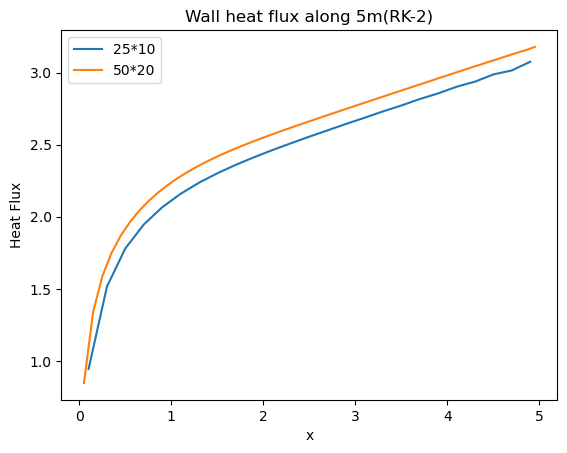

In [ ]:
Nx11=25
Ny11=10
x011=5
y011=1
dx11,dy11=x011/Nx11,y011/Ny11
x11=np.linspace(0-dx11/2,x011+dx11/2,Nx11+2)
plt.plot(x11[1:26],2*h1)

Nx22=50
Ny22=20
x022=5
y022=1
dx22,dy22=x022/Nx22,y022/Ny22
x22=np.linspace(0-dx22/2,x022+dx22/2,Nx22+2)
plt.plot(x22[1:51],2*h3)
plt.legend(['25*10','50*20'])
plt.ylabel('Heat Flux')
plt.xlabel('x')
plt.title('Wall heat flux along 5m(RK-2)')
plt.show()

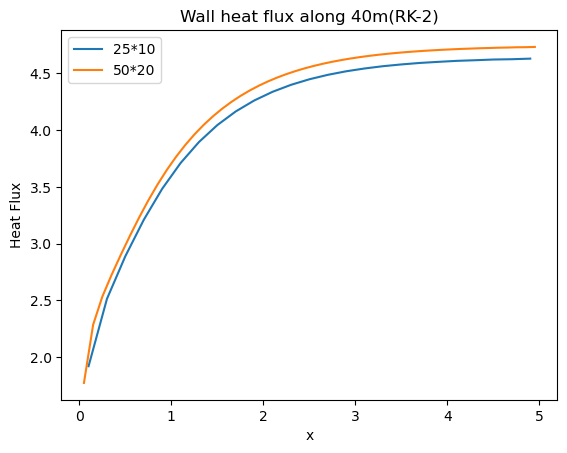

In [ ]:
Nx11=25
Ny11=10
x011=5
y011=1
dx11,dy11=x011/Nx11,y011/Ny11
x11=np.linspace(0-dx11/2,x011+dx11/2,Nx11+2)
plt.plot(x11[1:26],2*h2)

Nx22=50
Ny22=20
x022=5
y022=1
dx22,dy22=x022/Nx22,y022/Ny22
x22=np.linspace(0-dx22/2,x022+dx22/2,Nx22+2)
plt.plot(x22[1:51],2*h4)
plt.legend(['25*10','50*20'])
plt.ylabel('Heat Flux')
plt.xlabel('x')
plt.title('Wall heat flux along 40m(RK-2)')
plt.show()

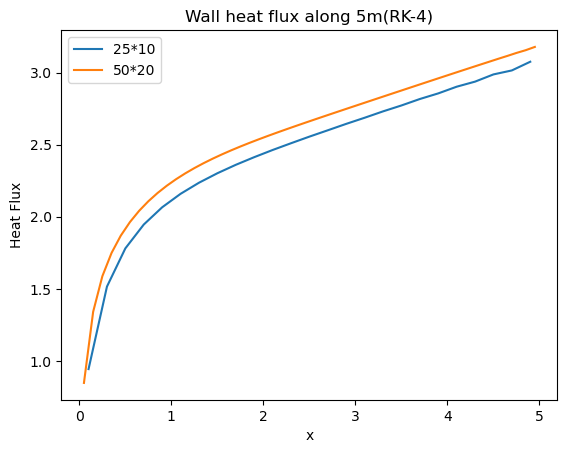

In [ ]:
Nx11=25
Ny11=10
x011=5
y011=1
dx11,dy11=x011/Nx11,y011/Ny11
x11=np.linspace(0-dx11/2,x011+dx11/2,Nx11+2)
plt.plot(x11[1:26],2*h5)

Nx22=50
Ny22=20
x022=5
y022=1
dx22,dy22=x022/Nx22,y022/Ny22
x22=np.linspace(0-dx22/2,x022+dx22/2,Nx22+2)
plt.plot(x22[1:51],2*h7)
plt.legend(['25*10','50*20'])
plt.ylabel('Heat Flux')
plt.xlabel('x')
plt.title('Wall heat flux along 5m(RK-4)')
plt.show()

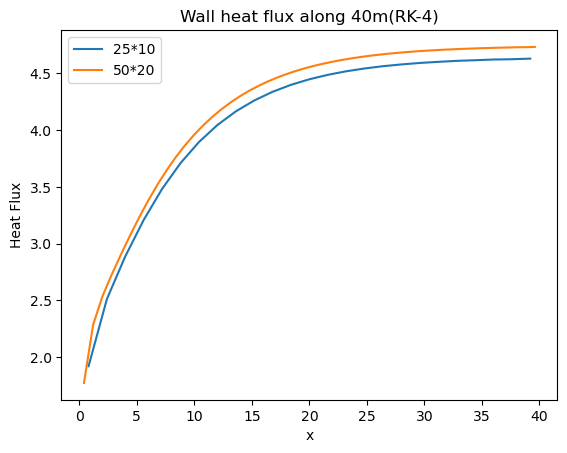

In [ ]:
Nx11=25
Ny11=10
x011=40
y011=1
dx11,dy11=x011/Nx11,y011/Ny11
x11=np.linspace(0-dx11/2,x011+dx11/2,Nx11+2)
plt.plot(x11[1:26],2*h6)

Nx22=50
Ny22=20
x022=40
y022=1
dx22,dy22=x022/Nx22,y022/Ny22
x22=np.linspace(0-dx22/2,x022+dx22/2,Nx22+2)
plt.plot(x22[1:51],2*h8)
plt.legend(['25*10','50*20'])
plt.ylabel('Heat Flux')
plt.xlabel('x')
plt.title('Wall heat flux along 40m(RK-4)')
plt.show()

# **7. Computational Performance Analysis**

## **7.1 CPU Time Comparison: Implicit vs. Explicit Methods**

Benchmark computational efficiency of Implicit, RK2, and RK4 methods.

In [ ]:
import timeit

start_time_im1 =timeit.default_timer()
[t11,q1]=implicit_real(25,10,5,1)
end_time_im1 =timeit.default_timer()
CPU_Time_im1 = end_time_im1 - start_time_im1
print(f"CPU Time for mesh 25*10 Approximate factorization: {CPU_Time_im1} seconds ")

start_time_im2 =timeit.default_timer()
[t22,q2] =implicit_real(50,20,5,1)
end_time_im2 =timeit.default_timer()
CPU_Time_im2 = end_time_im2 - start_time_im2
print(f"CPU Time for mesh 50*20 Approximate factorization: {CPU_Time_im2} seconds ")

start_time_rk21 =timeit.default_timer()
rk21 =RK2(25,10,5,1)
end_time_rk21 =timeit.default_timer()
CPU_Time_rk21 = end_time_rk21 - start_time_rk21
print(f"CPU Time for mesh 25*10 RK2: {CPU_Time_rk21} seconds ")

start_time_rk22 =timeit.default_timer()
rk22 =RK2(50,20,5,1)
end_time_rk22 =timeit.default_timer()
CPU_Time_rk22 = end_time_rk22 - start_time_rk22
print(f"CPU Time for mesh 50*20 RK2: {CPU_Time_rk22} seconds ")

start_time_rk41 =timeit.default_timer()
rk41 =RK4(25,10,5,1)
end_time_rk41 =timeit.default_timer()
CPU_Time_rk41 = end_time_rk41 - start_time_rk41
print(f"CPU Time for mesh 25*10 RK4: {CPU_Time_rk41} seconds ")

start_time_rk42 =timeit.default_timer()
rk42 =RK2(50,20,5,1)
end_time_rk42 =timeit.default_timer()
CPU_Time_rk42 = end_time_rk42 - start_time_rk42
print(f"CPU Time for mesh 50*20 RK4: {CPU_Time_rk42} seconds ")

CPU Time for mesh 25*10 Approximate factorization: 42.24719809999806 seconds 
CPU Time for mesh 50*20 Approximate factorization: 524.1999784999934 seconds 
CPU Time for mesh 25*10 RK2: 1.60238960001152 seconds 
CPU Time for mesh 50*20 RK2: 3.402341700013494 seconds 
CPU Time for mesh 25*10 RK4: 2.6500496999942698 seconds 
CPU Time for mesh 50*20 RK4: 3.4184051000047475 seconds 
